In [2256]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pickle as pkl

In [2257]:
df = pd.read_csv('cardio.csv')

In [2258]:
df#gender 1- women, 2- men

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,Exact_Age
0,1,158,64.0,1,1,1,1,0,0,0,45
1,1,165,55.0,1,1,2,2,0,0,0,56
2,1,165,60.0,1,1,1,1,0,0,0,52
3,1,159,76.0,1,1,1,1,0,0,0,43
4,1,160,60.0,1,1,1,1,0,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...
48882,2,170,70.0,3,3,1,1,0,0,1,52
48883,1,165,75.0,3,3,1,1,0,0,1,52
48884,1,163,72.0,3,3,1,1,0,0,1,55
48885,2,178,80.0,3,3,3,1,0,0,1,61


In [2259]:
df.duplicated().sum()

np.int64(5543)

In [2260]:
from datetime import datetime, timedelta

In [2261]:
#df["Exact_Age"] = df["age"].apply(convert_days_to_exact_age)

In [2262]:
##df["Exact_Age"]

In [2263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48887 entries, 0 to 48886
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       48887 non-null  int64  
 1   height       48887 non-null  int64  
 2   weight       48887 non-null  float64
 3   ap_hi        48887 non-null  int64  
 4   ap_lo        48887 non-null  int64  
 5   cholesterol  48887 non-null  int64  
 6   gluc         48887 non-null  int64  
 7   smoke        48887 non-null  int64  
 8   alco         48887 non-null  int64  
 9   cardio       48887 non-null  int64  
 10  Exact_Age    48887 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 4.1 MB


In [2264]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,Exact_Age
0,1,158,64.0,1,1,1,1,0,0,0,45
1,1,165,55.0,1,1,2,2,0,0,0,56
2,1,165,60.0,1,1,1,1,0,0,0,52
3,1,159,76.0,1,1,1,1,0,0,0,43
4,1,160,60.0,1,1,1,1,0,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...
48882,2,170,70.0,3,3,1,1,0,0,1,52
48883,1,165,75.0,3,3,1,1,0,0,1,52
48884,1,163,72.0,3,3,1,1,0,0,1,55
48885,2,178,80.0,3,3,3,1,0,0,1,61


In [2265]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'cardio', 'Exact_Age'],
      dtype='object')

In [2266]:
#BMI = df["weight"] / (df["height"]/100)**2

In [2267]:
#BMI

In [2268]:
#df.drop("id",axis=1,inplace=True)
#df.drop("active",axis=1,inplace=True)
#df.drop("age",axis=1,inplace=True)
#df.drop_duplicates(inplace=True)
#out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200))
#df = df[~out_filter]
#len(df)

In [2269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48887 entries, 0 to 48886
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       48887 non-null  int64  
 1   height       48887 non-null  int64  
 2   weight       48887 non-null  float64
 3   ap_hi        48887 non-null  int64  
 4   ap_lo        48887 non-null  int64  
 5   cholesterol  48887 non-null  int64  
 6   gluc         48887 non-null  int64  
 7   smoke        48887 non-null  int64  
 8   alco         48887 non-null  int64  
 9   cardio       48887 non-null  int64  
 10  Exact_Age    48887 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 4.1 MB


In [2270]:
output_file = 'cardio.csv'

In [2271]:
#df.to_csv(output_file, index=False)

In [2272]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,48887.0,1.355575,0.478692,1.0,1.0,1.0,2.0,2.0
height,48887.0,164.344079,8.357191,55.0,159.0,165.0,170.0,250.0
weight,48887.0,73.716401,14.371430,11.0,64.0,72.0,82.0,200.0
ap_hi,48887.0,1.676028,0.931862,1.0,1.0,1.0,3.0,3.0
ap_lo,48887.0,1.600200,0.858867,1.0,1.0,1.0,2.0,3.0
cholesterol,48887.0,1.339006,0.654021,1.0,1.0,1.0,1.0,3.0
gluc,48887.0,1.222902,0.567680,1.0,1.0,1.0,1.0,3.0
smoke,48887.0,0.095097,0.293352,0.0,0.0,0.0,0.0,1.0
alco,48887.0,0.057745,0.233264,0.0,0.0,0.0,0.0,1.0
cardio,48887.0,0.351361,0.477400,0.0,0.0,0.0,1.0,1.0


In [2273]:
X = df[['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'Exact_Age']]

In [2274]:
Y = df['cardio']

In [2275]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [2276]:
x_train.shape

(39109, 10)

In [2277]:
x_test.shape

(9778, 10)

In [2278]:
y_train.shape

(39109,)

In [2279]:
y_test.shape

(9778,)

# Logistic Regression


In [2280]:
model = LogisticRegression()

In [2281]:
model.fit(x_train,y_train)

LogisticRegression()

In [2282]:
y_pred = model.predict(x_test)

In [2283]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], shape=(9778,))

In [2284]:
model.score(x_train,y_train)

0.9998977217520264

In [2285]:
from sklearn.metrics import accuracy_score

In [2286]:

from sklearn.metrics import confusion_matrix, classification_report,precision_score

In [2287]:
lacc = accuracy_score(y_test,y_pred)

In [2288]:
lacc

0.9996931887911639

In [2289]:
confusion_matrix(y_test,y_pred)

array([[6339,    3],
       [   0, 3436]])

In [2290]:
acc = ((7918+2459)/(7918+2459+3385+6932))#TP+TN/TP+TN+FP+PN
print('accuracy',acc)

accuracy 0.5014496955639316


In [2291]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6342
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      9778
   macro avg       1.00      1.00      1.00      9778
weighted avg       1.00      1.00      1.00      9778



<Axes: >

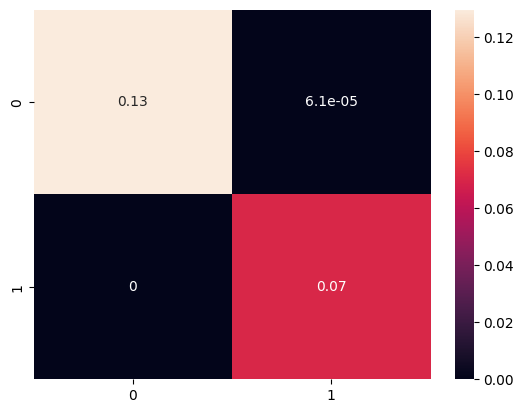

In [2292]:
sns.heatmap(confusion_matrix(y_test,y_pred) / len(Y), annot = True)

# Normalising usind MinMax Scalar and Rebuilt Logistic Regression

In [2293]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2294]:
#scaler = StandardScaler()
#x_trained = scaler.fit_transform(x_train)
#x_tested = scaler.transform(x_test)

In [2295]:
#x_trained.shape

# Create new logistic regression model, fit on normalized training set and predict on the normalisation test set

In [2296]:
model1 = LogisticRegression()

In [2297]:
model1.fit(x_train,y_train)

LogisticRegression()

In [2298]:
y_pred1 = model1.predict(x_test)

In [2299]:
y_pred1

array([0, 0, 0, ..., 0, 1, 1], shape=(9778,))

In [2300]:
model1.score(x_train,y_train)

0.9998977217520264

In [2301]:
acc1 = accuracy_score(y_test,y_pred1)

In [2302]:
acc1

0.9996931887911639

In [2303]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6342
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      9778
   macro avg       1.00      1.00      1.00      9778
weighted avg       1.00      1.00      1.00      9778



# Decision Tree Classifier

In [2304]:
model2 = DecisionTreeClassifier()

In [2305]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [2306]:
y_pred2 = model2.predict(x_test)

In [2307]:
y_pred2

array([0, 0, 0, ..., 0, 1, 1], shape=(9778,))

In [2308]:
model2.score(x_train,y_train)

1.0

In [2309]:
acc2 = accuracy_score(y_test,y_pred2)

In [2310]:
acc2

1.0

In [2311]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6342
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      9778
   macro avg       1.00      1.00      1.00      9778
weighted avg       1.00      1.00      1.00      9778



# Random Forest Classifier

In [2312]:
model3 = RandomForestClassifier()

In [2313]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [2314]:
y_pred3 = model3.predict(x_test)

In [2315]:
y_pred3

array([0, 0, 0, ..., 0, 1, 1], shape=(9778,))

In [2316]:
model3.score(x_train,y_train)

1.0

In [2317]:
acc3 = accuracy_score(y_test,y_pred3)

In [2318]:
acc3

1.0

In [2319]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6342
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      9778
   macro avg       1.00      1.00      1.00      9778
weighted avg       1.00      1.00      1.00      9778



# Support Vector Machine Classifiation


In [2320]:
#model4 = svm.SVC(kernel = 'linear')

In [2321]:
#model4.fit(x_train,y_train)

In [2322]:
#y_pred4 = model4.predict(x_test)

In [2323]:
#y_pred4

In [2324]:
#acc4 = accuracy_score(y_test,y_pred4)

In [2325]:
#acc4

# KNeighborsClassifier

In [2326]:
model5 = KNeighborsClassifier()

In [2327]:
model5.fit(x_train,y_train)

KNeighborsClassifier()

In [2328]:
y_pred5 = model5.predict(x_test)

In [2329]:
y_pred5

array([0, 0, 0, ..., 0, 1, 1], shape=(9778,))

In [2330]:
acc5 = accuracy_score(y_test,y_pred5)

In [2331]:
acc5

0.9764778073225608

In [2332]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6342
           1       0.99      0.94      0.97      3436

    accuracy                           0.98      9778
   macro avg       0.98      0.97      0.97      9778
weighted avg       0.98      0.98      0.98      9778



# Naive Bayes Classifier

In [2333]:
model6 = GaussianNB()

In [2334]:
model6.fit(x_train,y_train)

GaussianNB()

In [2335]:
y_pred6 = model6.predict(x_test)

In [2336]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], shape=(9778,))

In [2337]:
acc6 = accuracy_score(y_test,y_pred6)

In [2338]:
acc6

1.0

In [2339]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6342
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      9778
   macro avg       1.00      1.00      1.00      9778
weighted avg       1.00      1.00      1.00      9778



# Finding Best Model


In [2340]:
print('Logistic Regression',lacc)
print('Logistic Regression with MinmaxScaler',acc1)
print('Decision Tree classifier',acc2)
print('Random Forest classifier',acc3)
#print('support vector machine classifier',acc4)
print('k nearest neighbour classifier',acc5)
print('naive bayes classifier',acc6)

Logistic Regression 0.9996931887911639
Logistic Regression with MinmaxScaler 0.9996931887911639
Decision Tree classifier 1.0
Random Forest classifier 1.0
k nearest neighbour classifier 0.9764778073225608
naive bayes classifier 1.0


# naive bayes classifier is the best model with the best accuracy of 72%

In [2341]:
d = pkl.dump(model6,open('cardio.pkl','wb'))

In [2342]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
48882    1
48883    1
48884    1
48885    1
48886    1
Name: cardio, Length: 48887, dtype: int64